# DMML-05

Adatvizualizációs eszközök; interaktív vizualizációk; dashboardok.

Apagyi Dávid  
2025-10-09

**Honlap:** <a href="https://apagyidavid.web.elte.hu/2025-2026-1/dmml"
target="_blank">apagyidavid.web.elte.hu/2025-2026-1/dmml</a>

<a target="_blank" href="https://colab.research.google.com/github/dapagyi/dmml-web/blob/notebooks/dmml-05.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gyorslinkek

## Statikus ábrákhoz

-   <a href="https://matplotlib.org/stable/gallery/index.html"
    target="_blank">Matplotlib</a>
-   <a href="https://seaborn.pydata.org/examples/index.html"
    target="_blank">Seaborn</a>

## Interaktív ábrákhoz

-   <a href="https://plotly.com/python/" target="_blank">Plotly</a>
-   <a href="https://docs.bokeh.org/en/latest/docs/gallery.html"
    target="_blank">Bokeh</a>
-   <a href="https://altair-viz.github.io/gallery/index.html"
    target="_blank">Altair</a>

Néhány további példa Matplotlibhez, Seabornhoz, illetve Plotlyhez
<a href="https://python-charts.com/" target="_blank">elérhető ezen a
linken.</a>

## Dashboardokhoz, appokhoz

Ezek gyakran speciálisabb hostingot is igényelnek, pl. azért, hogy az
interaktív működéshez a szerveren futó Python kód valami komplexebb
számítást – pl. predikciót – elvégezzen. Az első épp nem ilyen, azzal
csak statikus HTML oldalakat készít.

-   <a href="https://quarto.org/docs/gallery/#dashboards"
    target="_blank">Quarto dashboards</a>
-   <a href="https://streamlit.io/gallery" target="_blank">Streamlit</a>
-   <a href="https://plotly.com/examples/" target="_blank">Dash</a>
-   <a href="https://panel.holoviz.org/gallery/index.html"
    target="_blank">Panel</a>

Érdemes időnként átpörgetni a példákat, hátha véletlenül szembejön
valami olyan, ami épp jól alkalmazható az aktuális feladatunknál.
Mindegyik link a csomag galériájára mutat.

# Adatvizualizációs eszközök

A `matplotlib`, mint korábban már láttuk, egy alacsony szintű, de
sokoldalú eszköz vizualizációk készítésére. A `seaborn` ezzel szemben
egy *magasabb szintű* eszköz, amely a `matplotlib`-re épül, és
leegyszerűsíti a gyakran használt ábrák elkészítését. Érdemes használni
a rutinfeladathoz, mert a korrekt alapértelmezései miatt aránylag
gyorsan lehet vele aránylag jó ábrákat készíteni.

Érdemes még megemlíteni a `matplotlib` egy idekapcsolódó, ritkábban
használt funkcióját, a `style sheet`-eket. Ezekkel a hasonló
stílusjegyeket könnyen be lehet állítani minden ábrához.

-   <a
    href="https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html"
    target="_blank">Style sheets reference</a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("http://dmml.dapagyi.dedyn.io/static/dmml-2025-09-25/train.csv")

numerical_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "bool"]).columns.tolist()

df.head()

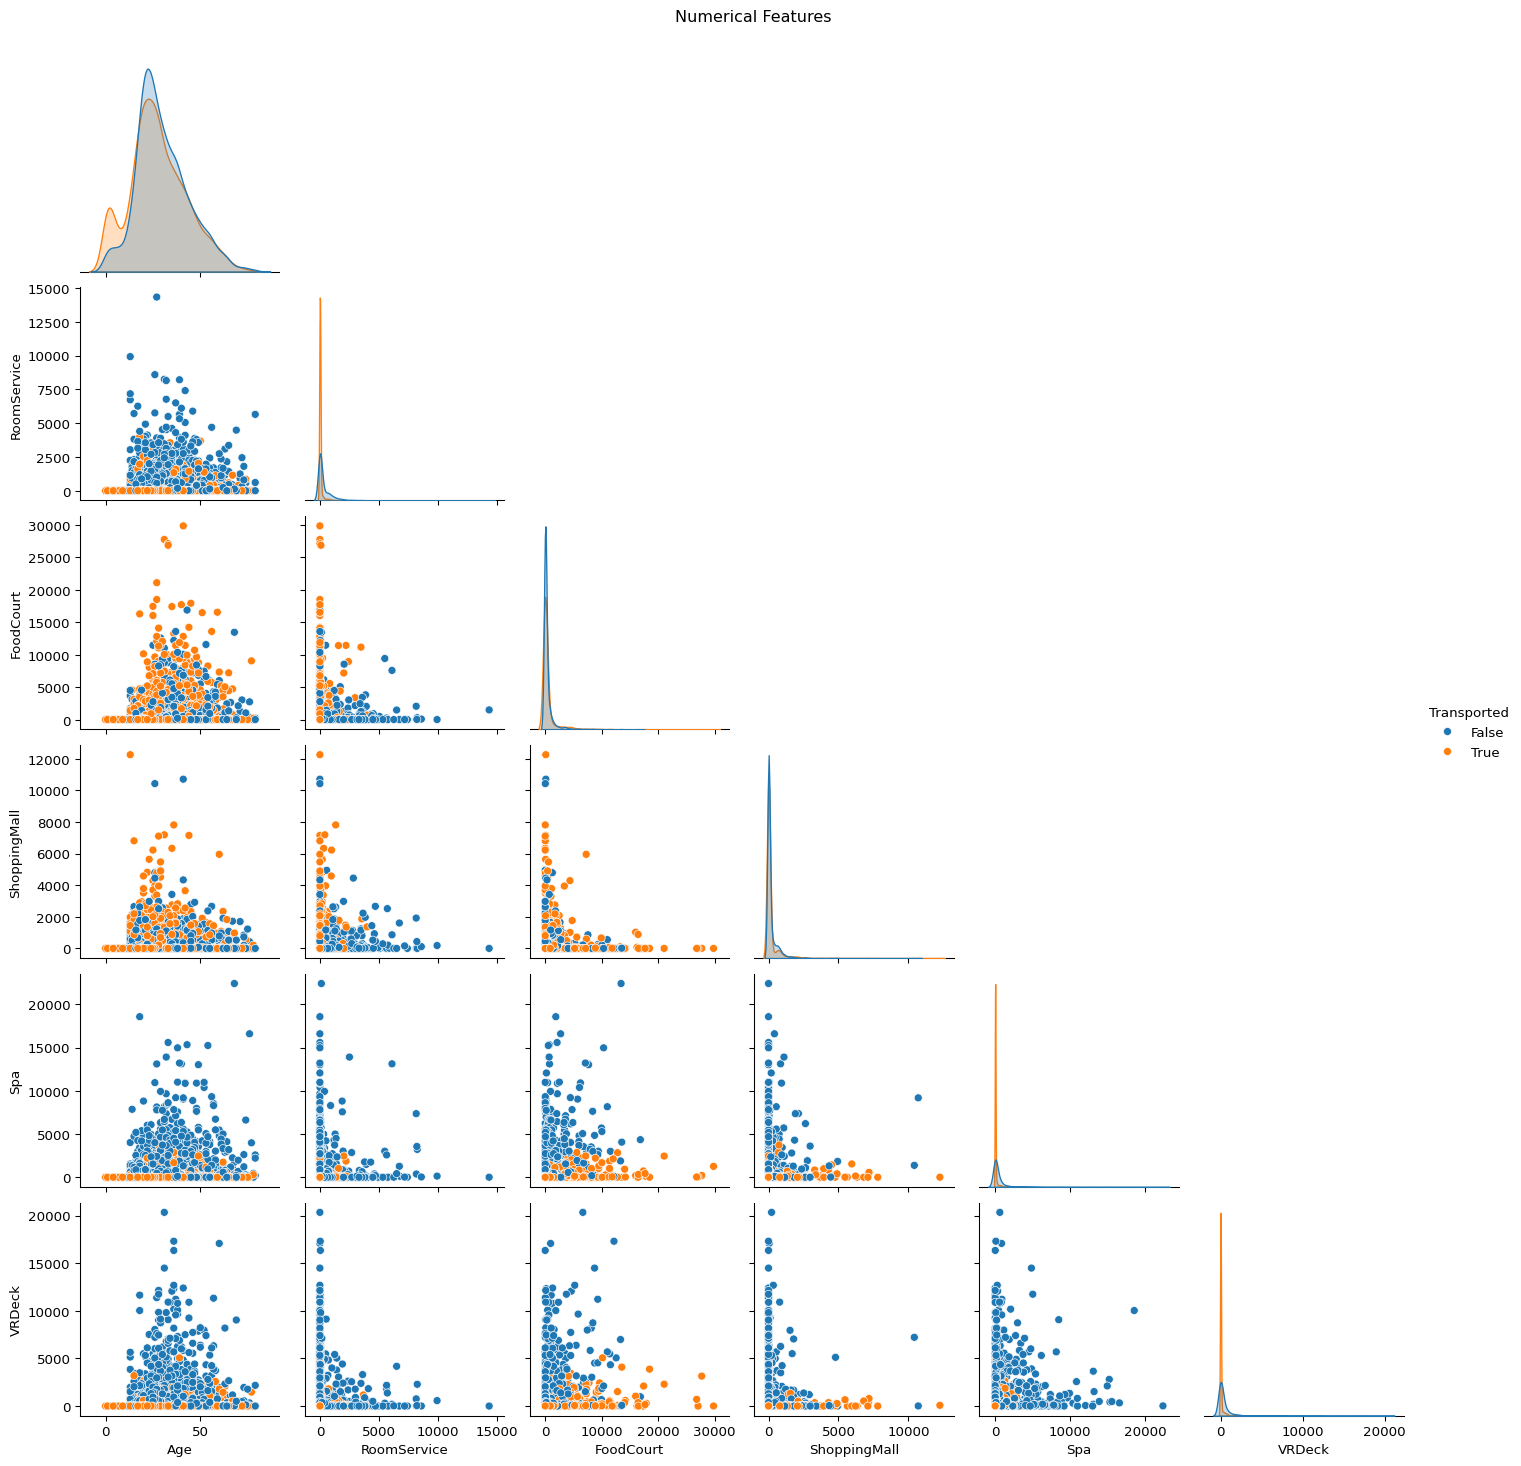

In [2]:
sns.pairplot(df[numerical_features + ["Transported"]], hue="Transported", corner=True)
plt.suptitle("Numerical Features", y=1.02)
plt.show()

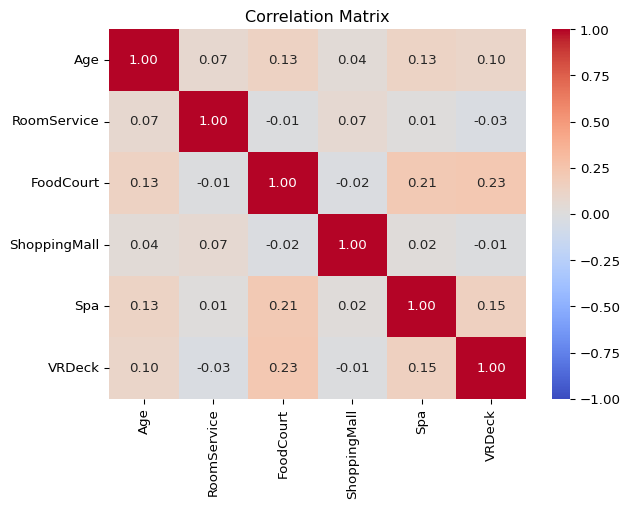

In [3]:
fig, ax = plt.subplots()
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
ax.set_title("Correlation Matrix")
plt.show()

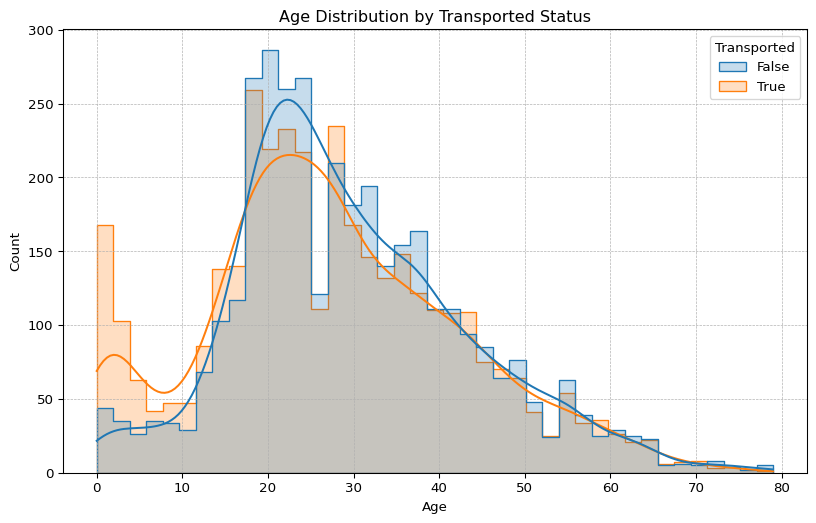

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x="Age", hue="Transported", kde=True, element="step", stat="count", common_norm=False, ax=ax)
ax.set_title("Age Distribution by Transported Status")
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## Nyomdakész ábrák

Ha nyomdakész ábrákra van szükségünk pl. szakdolgozathoz, publikációhoz,
akkor érdemes lehet pdf vagy svg formátumban menteni az ábrákat, mivel
ilyenkor vektorgrafikus formátumban kerülnek mentésre, szóval ha
belenagyítunk, akkor sem lesznek pixelesek.

Eltérő kontextusban ez akár arra is jó lehet, hogy az elmentett
vektorgrafikus ábrát egy másik programmal (pl. Inkscape, Adobe
Illustrator, stb.) tovább szerkesszük.

# Interaktív vizualizációk

Az interaktív vizualizációk terén nem igazán alakult egyetlen domináns
eszköz, jelenleg a gyorslinkek között felsorolt eszközök a
legismertebbek.

A `plotly` egy viszonylag könnyen használható könyvtár, de azért
összetettebb ábrákat készíteni már nem mindig annyira egyszerű vele.
LLM-ek gyakran tudnak ebben is segíteni – csakúgy mint a korábbiak
esetében is –, de a dokumentációt, valamint a példákat is érdemes
nézegetni.

A `plotly.express` hasonlóan viszonyul a `plotly`-hoz, mint a `seaborn`
a `matplotlib`-hez: egy magasabb szintű API, amely leegyszerűsíti a
gyakran használt ábrák elkészítését.

A korábban már linkelt galériát érdemes végiggörgetni, néhányat
kipróbálni. Egy nagyon egyszerű illusztráció:

In [5]:
import plotly.express as px


df = px.data.iris()
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species", title="Iris Dataset")
fig.show()

<a
href="https://apagyidavid.web.elte.hu/EEG/results/2025-07-03/EEG1-2693-art-l/peak_viz-distance_32.0-height_0.5-moving_avg_window_1-threshold_0.25-width_3.html"
target="_blank">Ezen a linken elérhető</a> egy valamivel összetettebb
saját példa is.

# Dashboardok

A projektnél választható feladat a dashboard (vagy más app) készítése.
Ezalatt kb. az alábbiakhoz hasonló, egyszerű weboldalakra lehet
gondolni:

-   <a href="https://jjallaire.github.io/stock-explorer-dashboard/"
    target="_blank">Stock Explorer</a>
-   <a href="https://jjallaire.github.io/gapminder-dashboard/"
    target="_blank">Worldwide Development</a>
-   <a href="https://jjallaire.github.io/customer-churn-dashboard/"
    target="_blank">Customer Churn</a>

A fentiek mind a Quarto nevű csomaggal készültek, amivel statikus HTML
oldalakat lehet készíteni. Egyszerűen használható, az első dashboardot
pl. <a
href="https://github.com/jjallaire/stock-explorer-dashboard/blob/main/dashboard.qmd"
target="_blank">ezzel a rövid kóddal</a> lehet előállítani.

További példákat <a href="https://quarto.org/docs/gallery/#dashboards"
target="_blank">ezen az oldalon</a> találni.

*Ennél többet nem fog előkerülni ez a téma, de a dokumentáció, illetve a
példák jól használhatók. Ha valakit érdekel ez a lehetőség a projektben,
akkor szívesen segítek majd külön, ha esetleg elakad. (Egyébként a
honlapra kikerült Notebookok is ezzel a csomaggal készültek.)*